In [5]:
#%matplotlib inline
import numpy as np # Library for multi-dimensional arrays and math operations on them 
import pandas as pd # Library for data manipulation and analysis
import os # Interfacing python with the operating system
import matplotlib.pyplot as plt #Plotting library
import seaborn as sns #Plotting library with some statistical tools 
import nltk # Natural Language Processing toolkit, similar as textblob below, both have useful functions
from textblob import TextBlob
import string
import time
import re # Basically a string processing and manipulation library
from datetime import datetime ## Manipulating datetime inputs
from matplotlib.ticker import FuncFormatter
import sys
import urllib
import progressbar
import ipywidgets as widgets


### My plotting style is inputted here #####
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams["font.family"] = "Ubuntu"
plt.style.use('C:/Users/Toumba/Documents/plotstyle.mplstyle')
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['xtick.major.size'] = 8 
plt.rcParams['ytick.major.size'] = 8 
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
#plt.rcParams['xtick.minor.visible']=True
#plt.rcParams['ytick.minor.visible']=True
#plt.rcParams['xtick.minor.size'] = 5 
#plt.rcParams['ytick.minor.size'] = 5
#plt.rcParams['xtick.minor.width'] = 1.5
#plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
#############################################

biden_color='#2986cc'
trump_color='#cc0000'
pbar = None


def show_progress(block_num, block_size, total_size):
    global pbar
    if pbar is None:
        pbar = progressbar.ProgressBar(maxval=total_size)
        pbar.start()

    downloaded = block_num * block_size
    if downloaded < total_size:
        pbar.update(downloaded)
    else:
        pbar.finish()
        pbar = None
store_path='D:/Learning_data/COVID/owid-covid-data.csv'
CSV_URL = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
urllib.request.urlretrieve(CSV_URL,store_path,show_progress)


100% |########################################################################|


('D:/Learning_data/COVID/owid-covid-data.csv',
 <http.client.HTTPMessage at 0x249318455b0>)

In [6]:
df=pd.read_csv(store_path,lineterminator='\n')
countries=df.location.value_counts()
countries=countries.sort_index()

In [7]:
df.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
def comp_plot_country(df,country,start,end,dates_key):
    plt.clf()
    global country_sav
    country_sav=country
    df_country=df[df.location==country]
    global fig
    fig,ax=plt.subplots(figsize=(12,9))
    if dates_key=='days':
        days=df_country.index-df_country.index[0]
        plt.xlim(days[start],days[end]+0.1*days[end])
        plt.title('Country %s: maximum  cases per day %d'%(df_country.location.values[0],df_country.new_cases_smoothed.max()))

    elif dates_key=='dates':
        df_country.date = pd.to_datetime(df_country.date)
        df_country.set_index('date', inplace=True)
        days=df_country.index

    plt.plot(days[start:end],df_country.new_cases_smoothed[start:end]/df_country.new_cases_smoothed.max(),color=biden_color,label='New Cases')
    plt.plot(days[start:end],df_country.hosp_patients[start:end]/df_country.hosp_patients.max(),color=trump_color,label='Hospitalizations')
    plt.plot(days[start:end],df_country.icu_patients[start:end]/df_country.icu_patients.max(),color='#948787',label='In ICU')
    plt.plot(days[start:end],df_country.new_deaths_smoothed[start:end]/df_country.new_deaths_smoothed.max(),color='#448787',label='New Deaths')
    plt.grid()
    plt.legend(frameon=True,facecolor='white',framealpha=1,edgecolor='black',loc='best',fontsize=12)
    #print(df_country.new_cases_smoothed.max())
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(17))
    plt.ylabel(r'$\frac{Value}{Max Value}$')
    plt.xlabel('Day since start')
    plt.xticks(rotation=90)
    #fig.canvas.layout.width = '1200px'
    #fig.canvas.layout.height = '1200px'
    plt.tight_layout()
    #plt.clf()
    plt.show()
def on_button_clicked(b):
    global fig
    global country_sav
    fig.savefig("./normalized_cases_%s.png"%country_sav)

In [9]:
button = widgets.Button(description="Savefig")
display(button)


dates_dict=['days','dates']
button.on_click(on_button_clicked)
widgets.interact(comp_plot_country,df=widgets.fixed(df),country=countries.index,start=widgets.IntSlider(min=0, max=700, step=1, value=0),end=widgets.IntSlider(min=-1, max=700, step=1, value=400),dates_key=dates_dict);


Button(description='Savefig', style=ButtonStyle())

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', …

In [16]:
def comp_plot_country_specific(df,country,plot_key,start,end,dates_key):
    plt.clf()
    global country_sav
    country_sav=country
    global key
    key=plot_key
    df_country=df[df.location==country]
    toplot=df_country[plot_key]
    global fig
    fig,ax=plt.subplots(figsize=(12,9))
    if dates_key=='days':
        days=df_country.index-df_country.index[0]
        plt.xlim(days[start],days[end]+0.1*days[end])
        plt.title('Country %s: maximum  cases per day %d'%(df_country.location.values[0],df_country.new_cases_smoothed.max()))

    elif dates_key=='dates':
        df_country.date = pd.to_datetime(df_country.date)
        df_country.set_index('date', inplace=True)
        days=df_country.index

    plt.plot(days[start:end],toplot[start:end],color=biden_color,label='New Cases')
    #plt.plot(days[start:end],df_country.hosp_patients[start:end]/df_country.hosp_patients.max(),color=trump_color,label='Hospitalizations')
    #plt.plot(days[start:end],df_country.icu_patients[start:end]/df_country.icu_patients.max(),color='#948787',label='In ICU')
    #plt.plot(days[start:end],df_country.new_deaths_smoothed[start:end]/df_country.new_deaths_smoothed.max(),color='#448787',label='New Deaths')
    plt.grid()
    plt.legend(frameon=True,facecolor='white',framealpha=1,edgecolor='black',loc='best',fontsize=12)
    #print(df_country.new_cases_smoothed.max())
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0),useMathText=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(17))
    plt.ylabel(r'%s'%plot_key)
    plt.xlabel('Day since start')
    plt.xticks(rotation=90)
    #fig.canvas.layout.width = '1200px'
    #fig.canvas.layout.height = '1200px'
    plt.tight_layout()
    #plt.clf()
    plt.show()
def on_button_clicked(b):
    global fig
    global country_sav
    fig.savefig("./%s_%s.png"%(key,country_sav))

In [17]:
button = widgets.Button(description="Savefig")
display(button)
dates_dict=['days','dates']
button.on_click(on_button_clicked)
widgets.interact(comp_plot_country_specific,df=widgets.fixed(df),country=countries.index,plot_key=df.keys(),start=widgets.IntSlider(min=-700, max=700, step=1, value=0),end=widgets.IntSlider(min=-1, max=700, step=1, value=400),dates_key=dates_dict);


Button(description='Savefig', style=ButtonStyle())

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', …

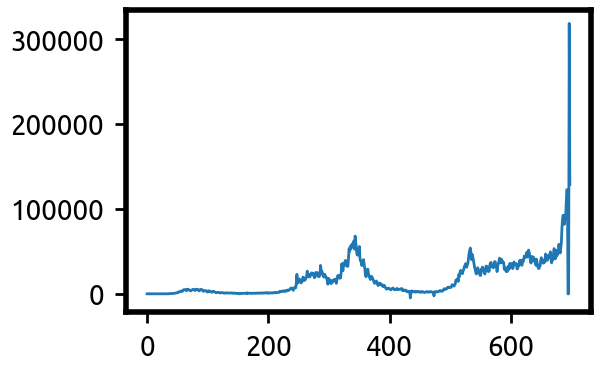

In [43]:
toplot=df['new_cases'][df.location=='United Kingdom']
days=df[df.location=='United Kingdom'].index-df[df.location=='United Kingdom'].index[0]
plt.plot(days,toplot)